In [1]:
import scvelo as scv
import loompy
import velocyto as vcy
import pandas as pd
import scanpy as sc
import numpy as np
scv.logging.print_version()
print(loompy.__version__)

Running scvelo 0.2.4 (python 3.9.6) on 2022-05-20 18:47.
3.0.7


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI's XMLRPC API is currently disabled due to unmanageable load and will be deprecated in the near future. See https://status.python.org/ for more information.


In [2]:
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

# Load in data

In [3]:
mbrain = scv.read_loom("/home/stat/kevinl1/nzhanglab/data/10x_mouse_embryo/velocyto/10x_mouse_embryo_subset.loom",
                     validate=False)

In [4]:
mbrain

AnnData object with n_obs × n_vars = 4878 × 32285
    obs: 'Clusters', '_X', '_Y', 'label.Savercat'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [5]:
celltype = pd.Categorical(mbrain.obs['label.Savercat'])

In [6]:
celltype

['Cajal-Retzius', 'Neuroblast', 'Forebrain GABAergic', 'Neuroblast', 'Neuroblast', ..., 'Cortical or hippocampal glutamatergic', 'Glioblast', 'Forebrain GABAergic', 'Neuroblast', 'Forebrain GABAergic']
Length: 4878
Categories (22, object): ['Blood', 'Cajal-Retzius', 'Cerebellum GABAergic', 'Cerebellum glutamatergic', ..., 'Neuroblast', 'Oligodendrocyte', 'Radial glia', 'Vascular']

In [7]:
mbrain.obs['celltype'] = celltype

In [8]:
mbrain

AnnData object with n_obs × n_vars = 4878 × 32285
    obs: 'Clusters', '_X', '_Y', 'label.Savercat', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [9]:
mbrain.obs['celltype']

CellID
10x_mouse_embryo:AACAGCAAGGTTTGCGx                            Cajal-Retzius
10x_mouse_embryo:AAACGTACAAGGCCAAx                               Neuroblast
10x_mouse_embryo:AACAGATAGTCCTGAGx                      Forebrain GABAergic
10x_mouse_embryo:AACAGGATCAATGTGCx                               Neuroblast
10x_mouse_embryo:AAAGGCTCAATATACCx                               Neuroblast
                                                      ...                  
10x_mouse_embryo:TTTCCTGAGTAGAGGCx    Cortical or hippocampal glutamatergic
10x_mouse_embryo:TTTGAGTCAGTTATGTx                                Glioblast
10x_mouse_embryo:TTTGTCTAGCAAACCTx                      Forebrain GABAergic
10x_mouse_embryo:TTTCTTGCAGGCCATTx                               Neuroblast
10x_mouse_embryo:TTTGGTAAGCCTGGTAx                      Forebrain GABAergic
Name: celltype, Length: 4878, dtype: category
Categories (22, object): ['Blood', 'Cajal-Retzius', 'Cerebellum GABAergic', 'Cerebellum glutamatergic', ..., 'N

In [10]:
mbrain.write_loom("/home/stat/kevinl1/nzhanglab/data/10x_mouse_embryo/velocyto/10x_mouse_embryo_subset_cleaned.loom")

see https://deepnote.com/@shahnawaz-ali/Loomprocessing-d2c43a64-4827-4a84-a600-91405d9ea0f4

and https://www.statology.org/pandas-select-rows-based-on-column-values/

and https://stackoverflow.com/questions/20528328/numpy-logical-or-for-more-than-two-arguments

and https://linnarssonlab.org/loompy/cookbook/index.html

# Try to subset using loompy.connect

In [53]:
ds = loompy.connect("/home/stat/kevinl1/nzhanglab/data/10x_mouse_embryo/velocyto/10x_mouse_embryo_subset_cleaned.loom", 'r+')

In [54]:
print(ds.ca.keys())

['CellID', 'Clusters', '_X', '_Y', 'celltype', 'label.Savercat']


In [55]:
ds.ca.celltype

array(['Cajal-Retzius', 'Neuroblast', 'Forebrain GABAergic', ...,
       'Forebrain GABAergic', 'Neuroblast', 'Forebrain GABAergic'],
      dtype=object)

In [56]:
vec1 = ds.ca['celltype'] == "Oligodendrocyte"
vec2 = ds.ca['celltype'] == "Radial glia"
vec3 = ds.ca['celltype'] == "Forebrain GABAergic"
vec4 = ds.ca['celltype'] == "Neuroblast"
vec5 = ds.ca['celltype'] == "Glioblast"
vec6 = ds.ca['celltype'] == "Cortical or hippocampal glutamatergic"
vecall = np.logical_or(np.logical_or(np.logical_or(np.logical_or(np.logical_or(vec1, vec2), vec3), vec4), vec5), vec6)

In [57]:
intergerVec = np.where(vecall)[0]

In [58]:
intergerVec

array([   1,    2,    3, ..., 4875, 4876, 4877])

In [59]:
dsout = loompy.new("/home/stat/kevinl1/nzhanglab/data/10x_mouse_embryo/velocyto/10x_mouse_embryo_subset_cleaned2.loom")

In [60]:
for (ix, selection, view) in ds.scan(items=intergerVec, axis=1):
        dsout.add_columns(view.layers, col_attrs=view.ca, row_attrs=view.ra)

In [61]:
ds.close()
dsout.close()

# Try to run scVelo now

In [11]:
mbrain = scv.read_loom("/home/stat/kevinl1/nzhanglab/data/10x_mouse_embryo/velocyto/10x_mouse_embryo_subset_cleaned2.loom",
                     validate=False)

In [12]:
mbrain

AnnData object with n_obs × n_vars = 4156 × 32285
    obs: 'Clusters', '_X', '_Y', 'celltype', 'label.Savercat'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [13]:
mbrain.obs['celltype'] 

CellID
10x_mouse_embryo:AAACGTACAAGGCCAAx                               Neuroblast
10x_mouse_embryo:AACAGATAGTCCTGAGx                      Forebrain GABAergic
10x_mouse_embryo:AACAGGATCAATGTGCx                               Neuroblast
10x_mouse_embryo:AAAGGCTCAATATACCx                               Neuroblast
10x_mouse_embryo:AAACGTACATCCTGAAx    Cortical or hippocampal glutamatergic
                                                      ...                  
10x_mouse_embryo:TTTCCTGAGTAGAGGCx    Cortical or hippocampal glutamatergic
10x_mouse_embryo:TTTGAGTCAGTTATGTx                                Glioblast
10x_mouse_embryo:TTTGTCTAGCAAACCTx                      Forebrain GABAergic
10x_mouse_embryo:TTTCTTGCAGGCCATTx                               Neuroblast
10x_mouse_embryo:TTTGGTAAGCCTGGTAx                      Forebrain GABAergic
Name: celltype, Length: 4156, dtype: object

In [14]:
mbrain.obs['clusters'] = pd.Categorical(mbrain.obs['celltype'])

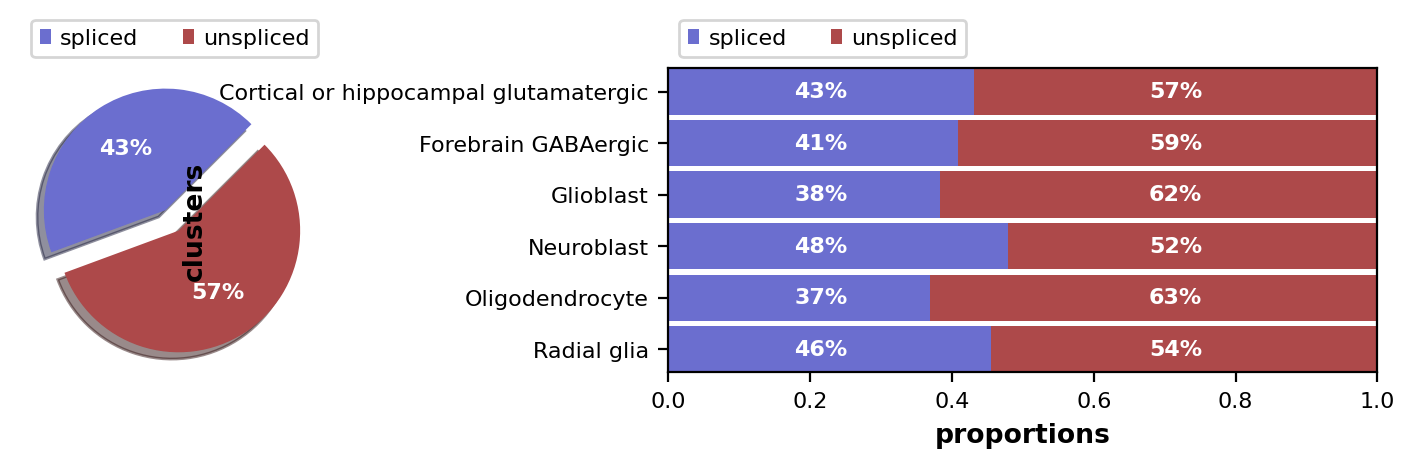

In [15]:
scv.pl.proportions(mbrain)

In [16]:
scv.pp.filter_and_normalize(mbrain, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mbrain, n_pcs=30, n_neighbors=30)

Filtered out 23332 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
mbrain

AnnData object with n_obs × n_vars = 4156 × 2000
    obs: 'Clusters', '_X', '_Y', 'celltype', 'label.Savercat', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [18]:
sc.tl.pca(mbrain, svd_solver='arpack')

In [19]:
sc.tl.umap(mbrain)

In [20]:
mbrain

AnnData object with n_obs × n_vars = 4156 × 2000
    obs: 'Clusters', '_X', '_Y', 'celltype', 'label.Savercat', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [21]:
sc.tl.leiden(mbrain)

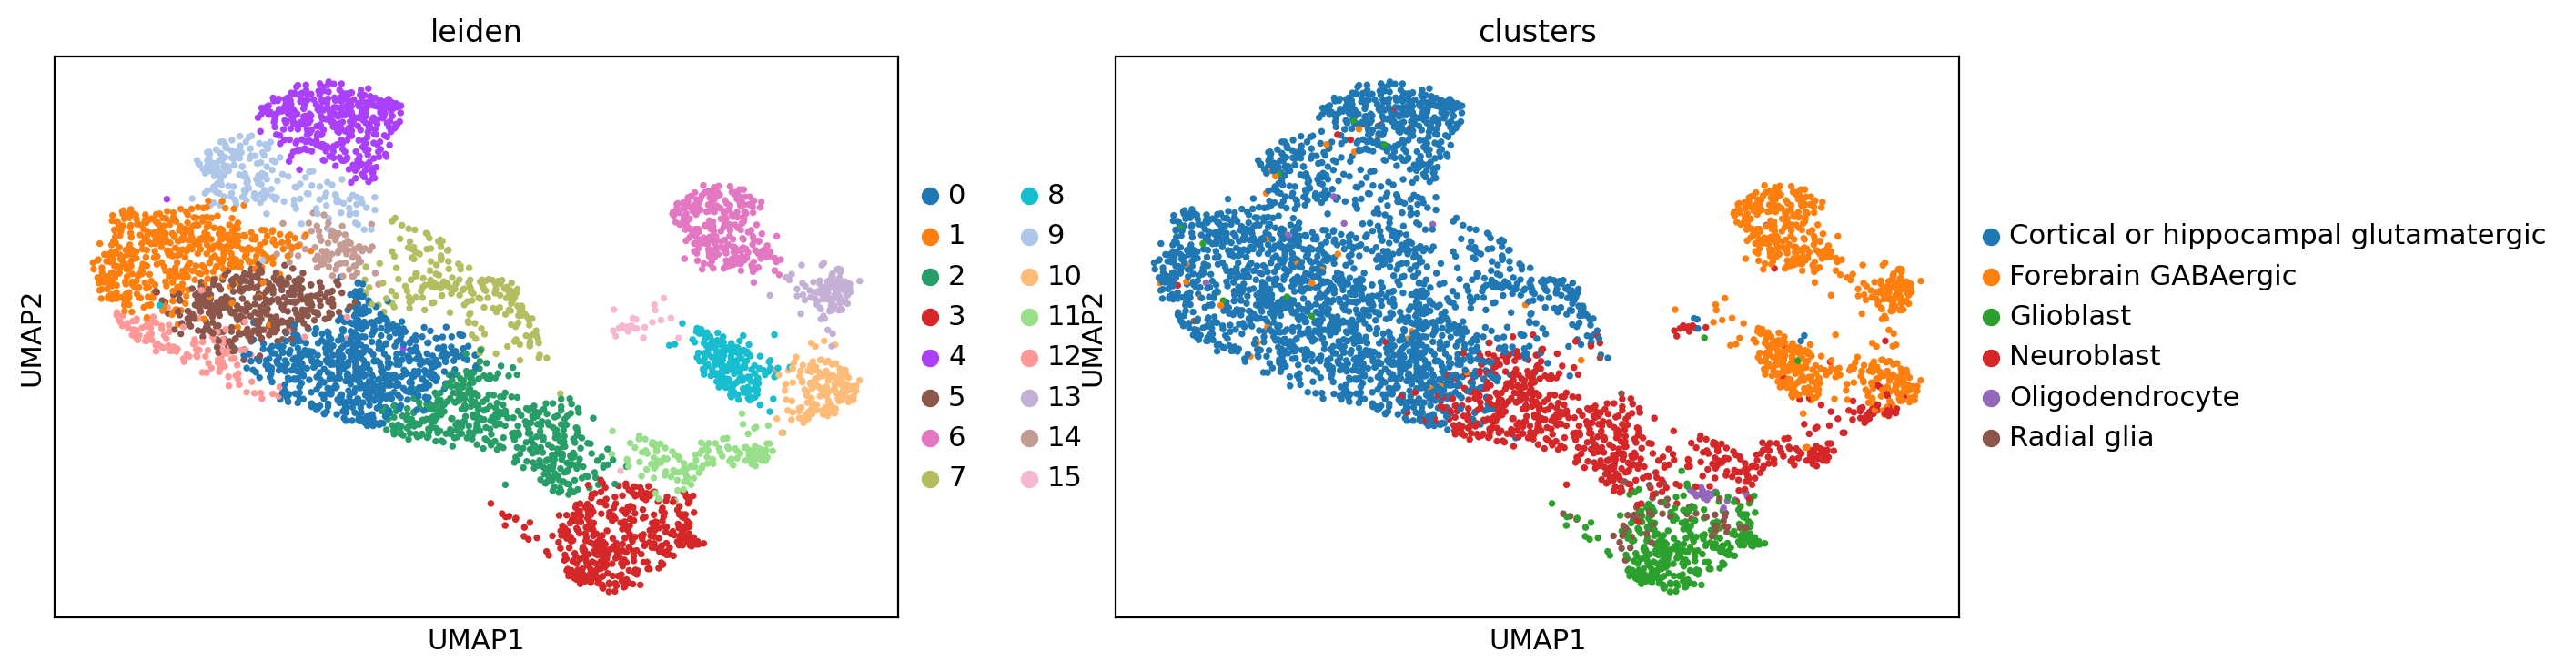

In [22]:
sc.pl.umap(mbrain, color=['leiden','clusters'])

In [23]:
scv.tl.velocity(mbrain)
scv.tl.velocity_graph(mbrain)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/4156 [00:00<?, ?cells/s]

    finished (0:00:37) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


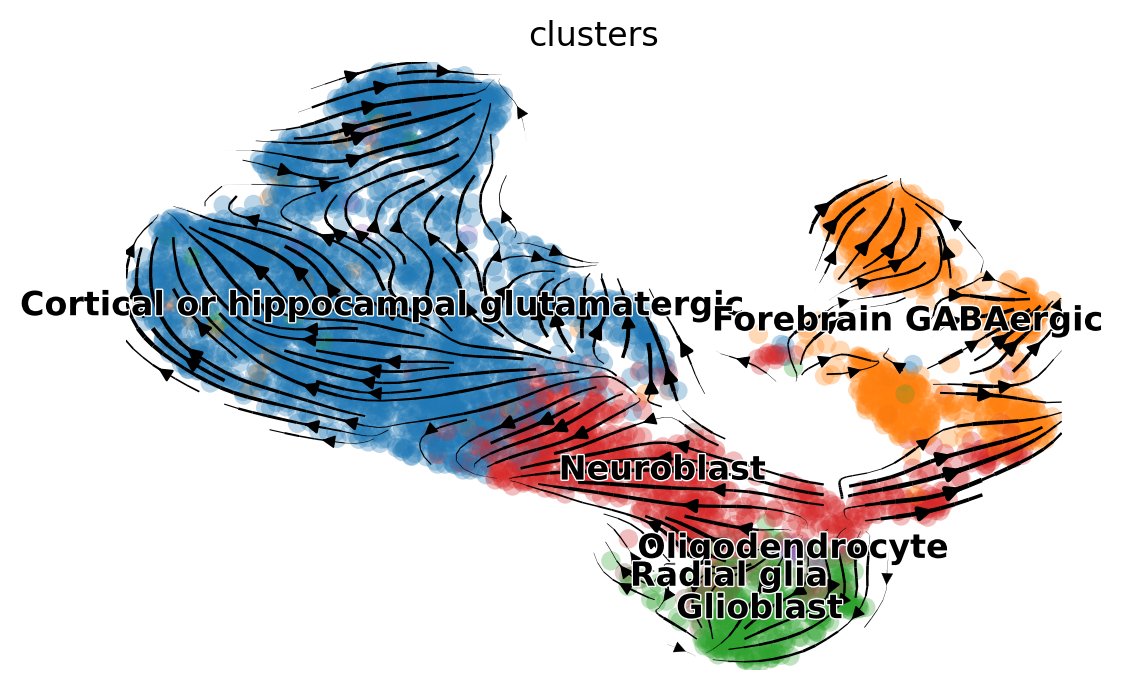

In [24]:
scv.pl.velocity_embedding_stream(mbrain, basis='umap')

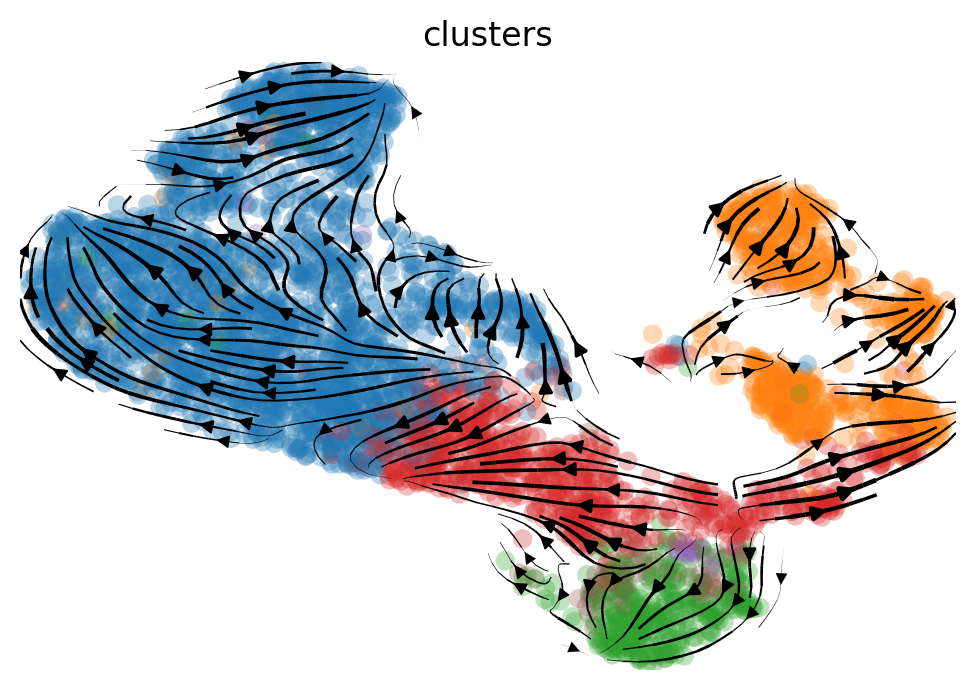

In [25]:
scv.pl.velocity_embedding_stream(mbrain, basis='umap', legend_loc='none')

computing terminal states
    identified 1 region of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


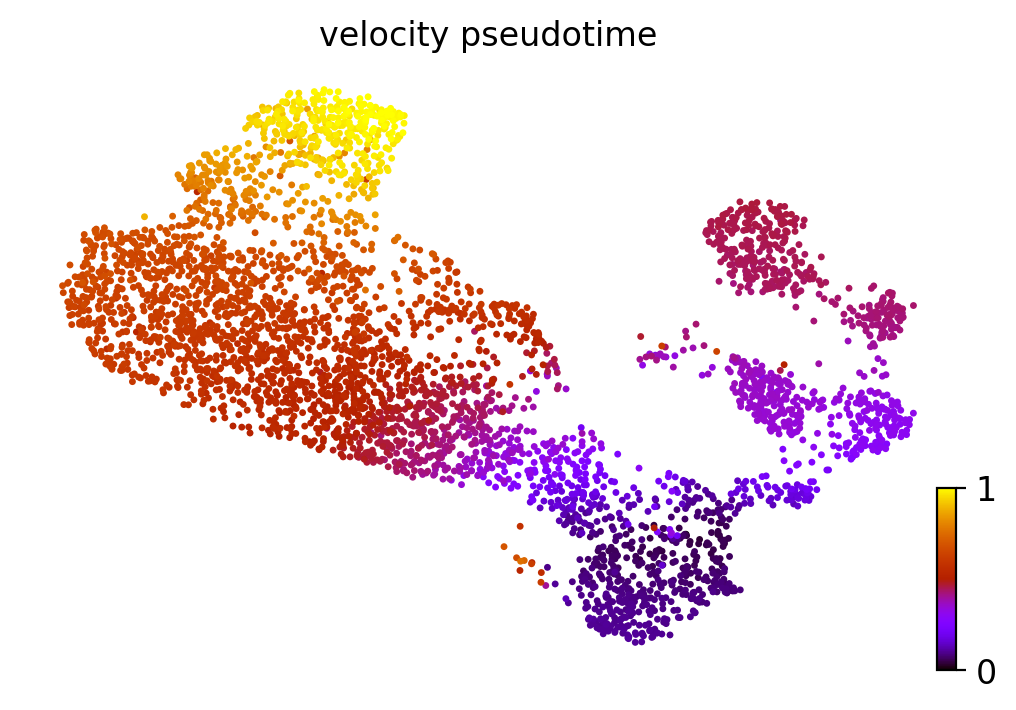

In [26]:
scv.tl.velocity_pseudotime(mbrain)
scv.pl.scatter(mbrain, color='velocity_pseudotime', cmap='gnuplot')

In [27]:
scv.tl.recover_dynamics(mbrain)

recovering dynamics (using 1/16 cores)


  0%|          | 0/1167 [00:00<?, ?gene/s]

    finished (0:10:31) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [28]:
scv.tl.velocity(mbrain, mode='dynamical')
scv.tl.velocity_graph(mbrain)

computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/4156 [00:00<?, ?cells/s]

    finished (0:00:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


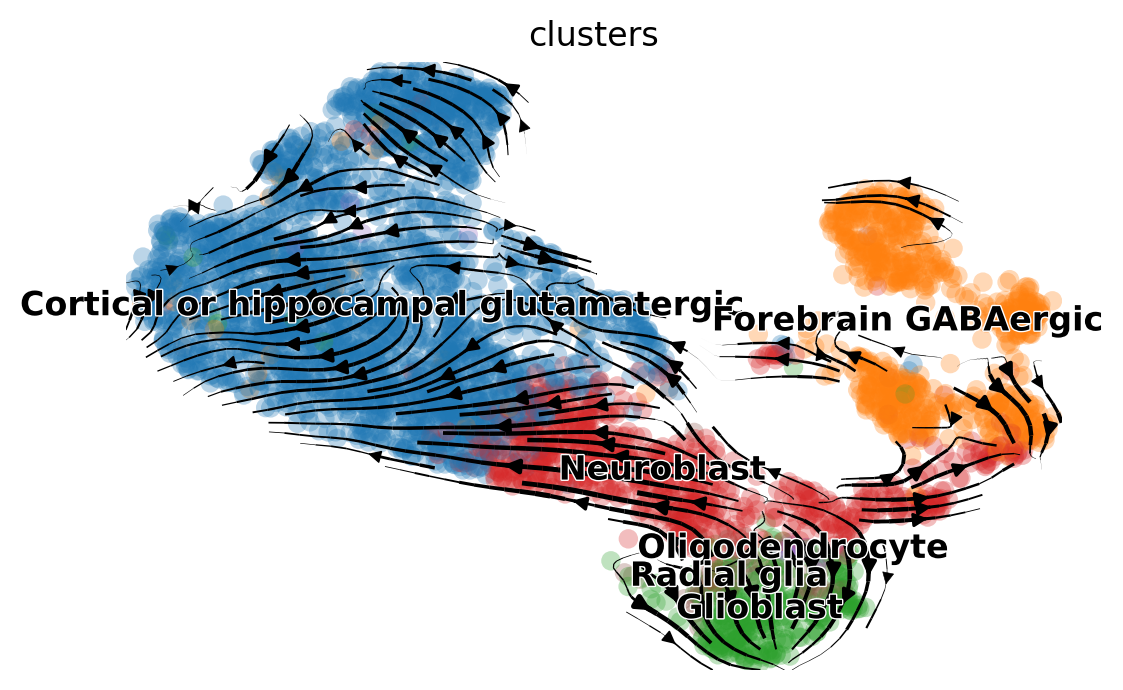

In [30]:
scv.pl.velocity_embedding_stream(mbrain, basis='umap')

computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


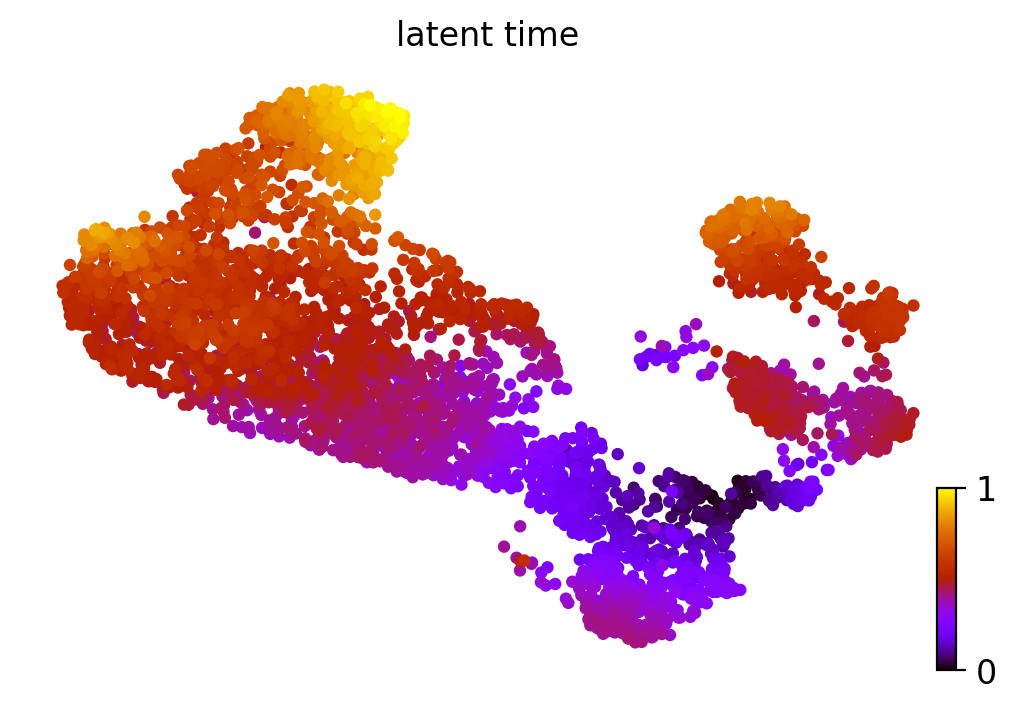

In [31]:
scv.tl.latent_time(mbrain)
scv.pl.scatter(mbrain, color='latent_time', color_map='gnuplot', size=80)

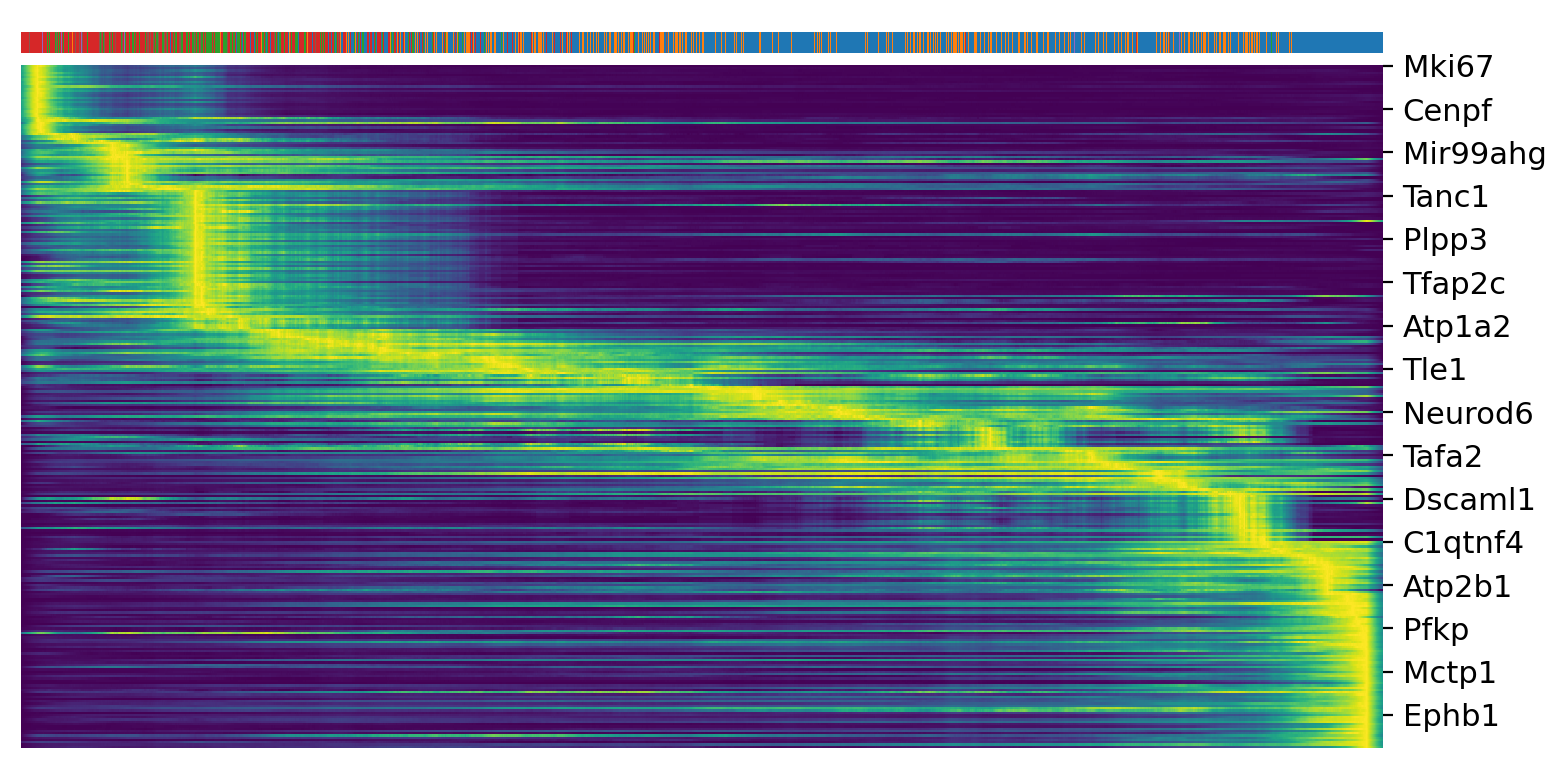

In [32]:
top_genes = mbrain.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(mbrain, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

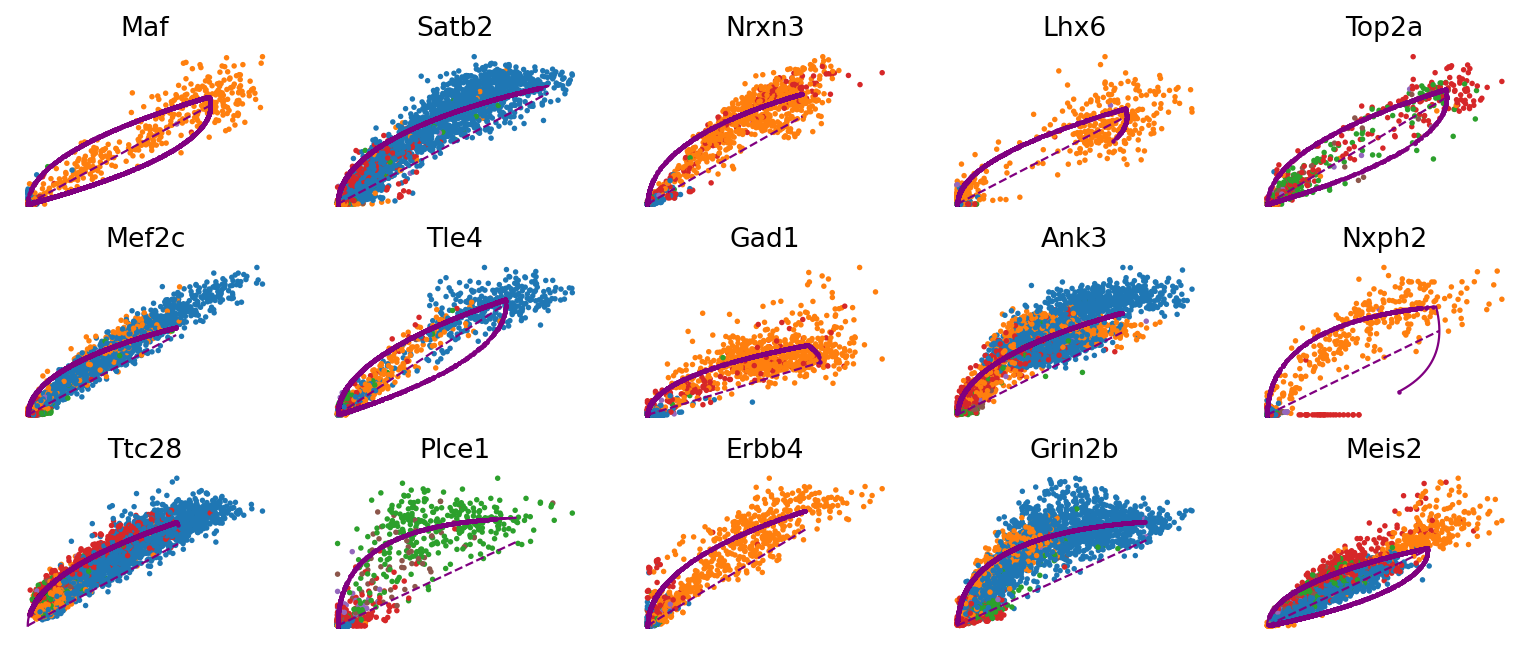

In [35]:
top_genes = mbrain.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(mbrain, basis=top_genes[:15], ncols=5, frameon=False)

In [36]:
scv.tl.rank_dynamical_genes(mbrain, groupby='clusters')
df = scv.get_df(mbrain, 'rank_dynamical_genes/names')
df.head(10)

ranking genes by cluster-specific likelihoods
    finished (0:00:06) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


Cortical or hippocampal glutamatergic Forebrain GABAergic Glioblast  \
0                                 Satb2              Grin2b     Top2a   
1                               Igfbpl1               Mef2c      Nfib   
2                                  Tcf4                 Maf     Meis2   
3                                 Tshz3                Lhx6      Tcf4   
4                                  Ank3               Nrxn3     Plce1   
5                                Sema3c               Nxph2     Epha4   
6                                 Basp1                Sox6      Knl1   
7                                Arpp21                Ank3     Mfge8   
8                                 Gria2               Erbb4       Cit   
9                                 Ttc28             Runx1t1     Kif23   

  Neuroblast Oligodendrocyte Radial glia  
0      Ttc28           Mef2c       Top2a  
1       Ank3            Ank3        Tcf4  
2      Meis2          Arpp21        Knl1  
3       Tcf4          Grin2b      Megf10  
4       Nrp1          Camk2b       Kif11  
5     Notch1           Gria2       Mki67  
6      Gria2          Csrnp3        Pdpn  
7     Bcl11a        Sfta3-ps       Sall3  
8      Epha3          Tcf7l2       Epha4  
9     Sema3c            Tcf4        Sox6

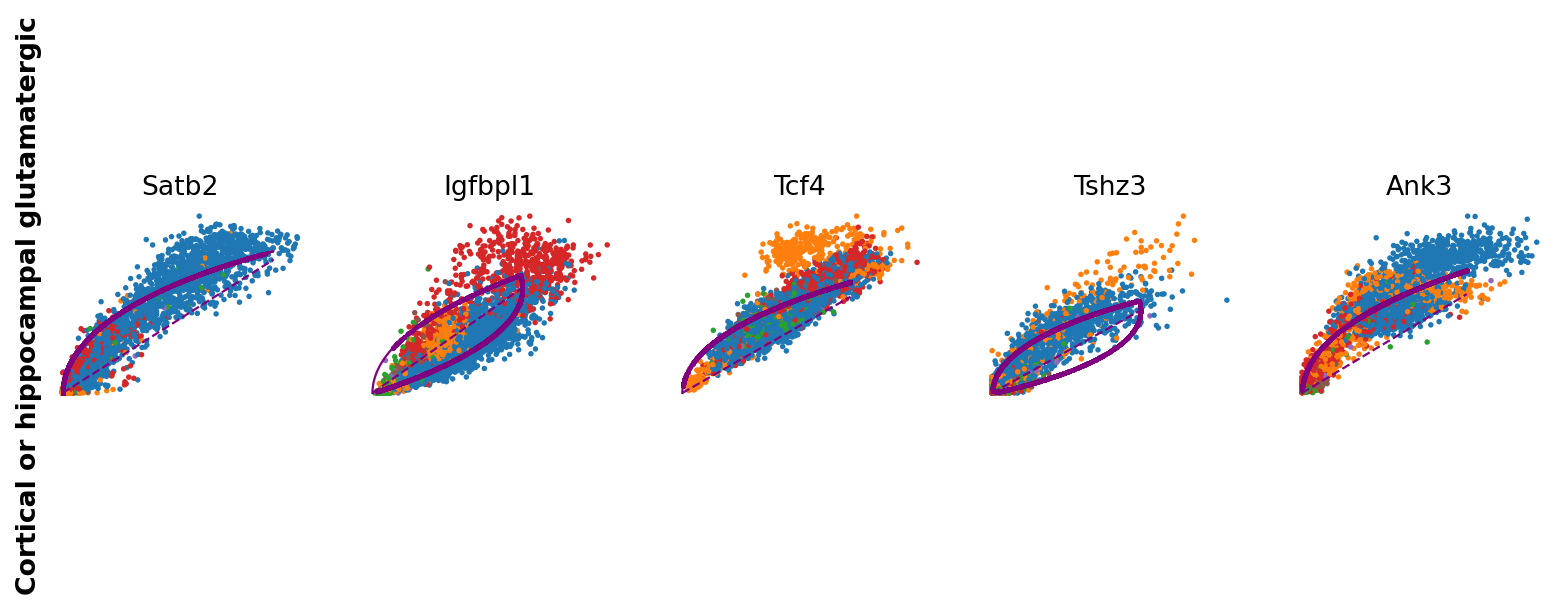

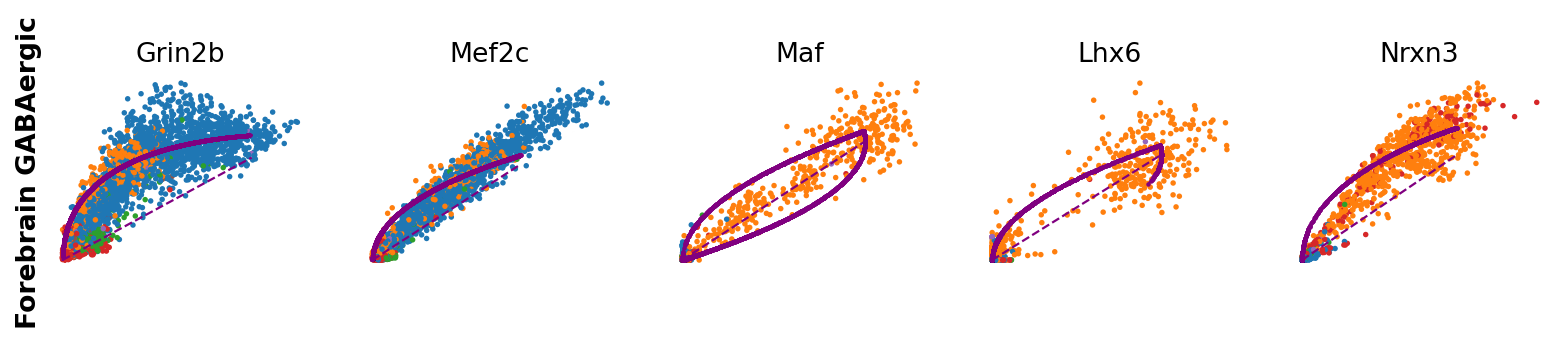

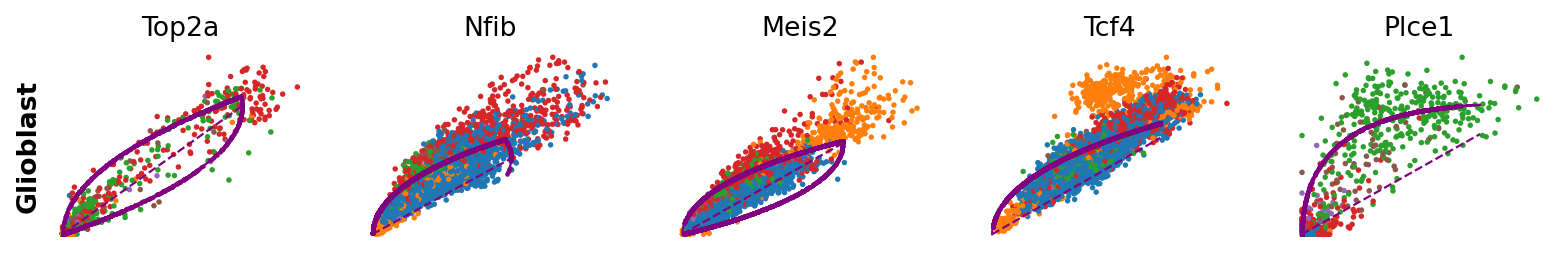

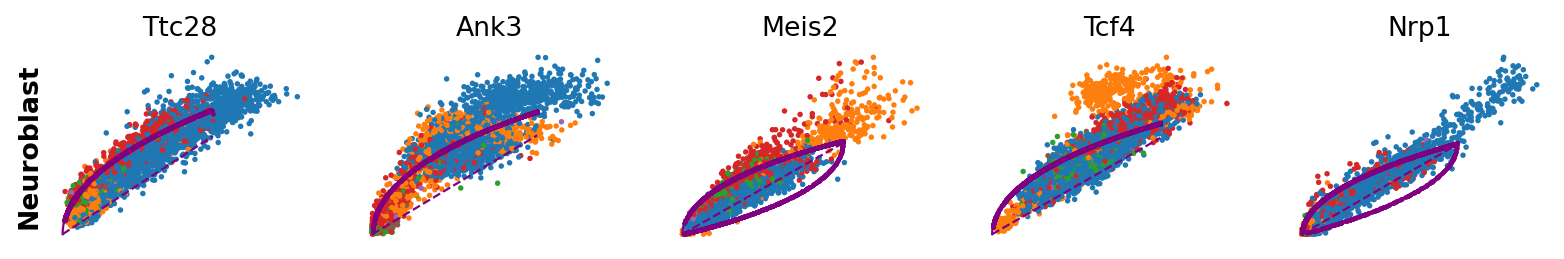

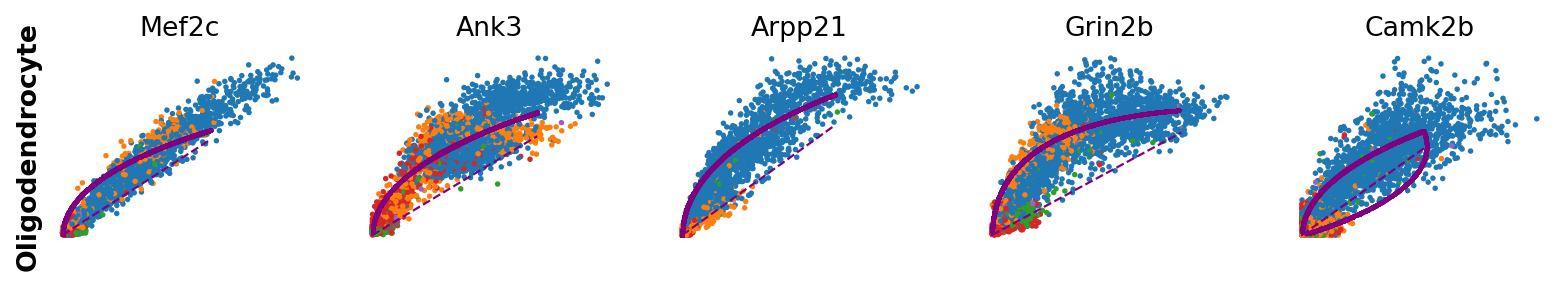

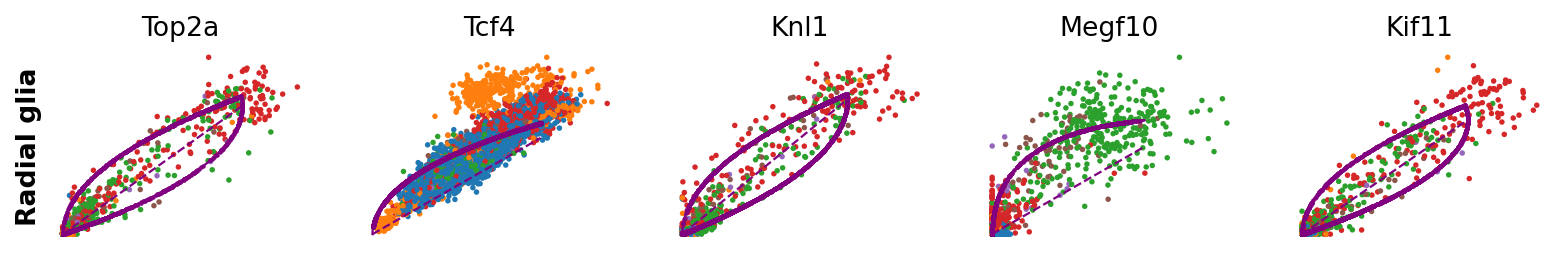

In [37]:
for cluster in ['Cortical or hippocampal glutamatergic', 'Forebrain GABAergic', 'Glioblast', 'Neuroblast', 'Oligodendrocyte', 'Radial glia']:
    scv.pl.scatter(mbrain, df[cluster][:5], ylabel=cluster, frameon=False)